# AI Reference Notebook

### Table of Contents

* [Chapter 1] Data Generation
    * [Section 1.1] Simple Data Generation
        * [Sub Section 1.1.1] Regression
        * [Sub Section 1.1.2] Classification
    * [Section 1.2] Complex Data Generation
        * [Sub Section 1.2.1] Noise Generation
        * [Sub Section 1.2.1] Recurrence
        * [Sub Section 1.2.1] Application
    * [Section 1.3] Tools
        * [Sub Section 1.3.1] MNIST
        * [Sub Section 1.3.2] SciKit
        * [Sub Section 1.3.3] Numpy
        * [Sub Section 1.3.4] Pandas

* [Chapter 2] Model Building
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data

* [Chapter 3] Model Optimization
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data       



# Classification AI

In [208]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import load_model

In [209]:
df = pd.read_csv("Generated Data.csv", index_col="Unnamed: 0")
df.head()

,Inputs,Outputs,Output Class,Inputs 0,Inputs 1,Inputs 2,Inputs 3,Inputs 4
0,"[3, 10, 3, 5, 9]",4.5,8,3,10,3,5,9
1,"[9, 6, 7, 1, 3]",1.5,2,9,6,7,1,3
2,"[8, 2, 2, 2, 10]",5.0,10,8,2,2,2,10
3,"[1, 7, 5, 3, 3]",1.5,2,1,7,5,3,3
4,"[1, 6, 9, 4, 4]",2.0,3,1,6,9,4,4


In [210]:
X = df.copy()[["Inputs 0", "Inputs 1", "Inputs 2", "Inputs 3", "Inputs 4"]]
Y = df.copy()["Output Class"]

In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [212]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(8000, 2000, 8000, 2000)

In [213]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(5, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(11, activation="softmax")
    ]
)

loss = keras.losses.SparseCategoricalCrossentropy()
optim = 'sgd'
metrics = ["accuracy"]

target_batch_size = 256
input_batch_size = len(X_train) // target_batch_size

early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model_chkpt = keras.callbacks.ModelCheckpoint(
    "test_model.hdf5",
    monitor='val_accuracy', 
    verbose=0, 
    save_best_only=True, 
    mode='max'
)

model.compile(loss=loss, optimizer=optim, metrics=metrics)

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=input_batch_size, 
                    epochs=100, 
                    verbose=1, 
                    validation_split = 0.2,
                    validation_data=(X_test, Y_test),
                    callbacks = [model_chkpt])

model = load_model("test_model.hdf5")

Epoch 1/100
259/259 [==============================] - 3s 6ms/step - loss: 1.8037 - accuracy: 0.2949 - val_loss: 2.0555 - val_accuracy: 0.2450
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 1.4809 - accuracy: 0.3836 - val_loss: 1.5420 - val_accuracy: 0.3570
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 1.3637 - accuracy: 0.4420 - val_loss: 1.6756 - val_accuracy: 0.2505
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 1.2886 - accuracy: 0.4709 - val_loss: 1.3570 - val_accuracy: 0.3840
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 1.2315 - accuracy: 0.4902 - val_loss: 1.6134 - val_accuracy: 0.4045
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 1.1827 - accuracy: 0.5142 - val_loss: 1.5352 - val_accuracy: 0.4705
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 1.1359 - accuracy: 0.5322 - val_loss: 1.4483 - val_accuracy: 0.4060

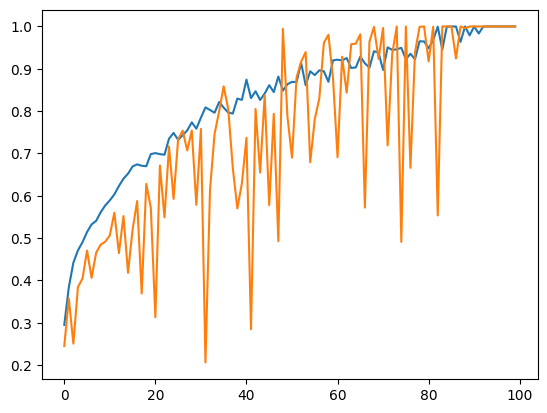

In [215]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()